In [23]:
import os
import pandas as pd

In [24]:
# 경로 설정
os.chdir(r'C:\Users\user\Python_study\data')

In [25]:
# 분석 데이터 Read
train = pd.read_csv("lspoons_train.csv") # 학습 데이터
test = pd.read_csv("lspoons_test.csv") # 예측해야 할 test 데이터
store = pd.read_csv("store.csv") # 상점에 대한 정보가 담긴 보조 데이터

# Feature Engineering
- 예측을 위해 기존의 input 변수를 이용하여 새로운 input 변수를 만들어내는 것
- 머신러닝 예측 성능을 올릴 수 있는 방법

# 1. StateHoliday 변수 변환

In [26]:
# StateHoliday 변수를 get_dummies 함수를 통해 수치화 (one hot encoding)
train = pd.get_dummies(columns=['StateHoliday'],data=train)
test = pd.get_dummies(columns=['StateHoliday'],data=test)

In [27]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,14929,85,2015-05-01,11360,1,0,0,1,0,0
1,14930,512,2015-05-01,10534,1,0,0,1,0,0
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0
3,14932,1,2015-04-30,6228,1,0,1,0,0,0
4,14933,9,2015-04-30,9717,1,0,1,0,0,0


In [28]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,0,1,2015-07-01,1,0,1,0
1,1,9,2015-07-01,1,1,1,0
2,2,11,2015-07-01,1,0,1,0
3,3,12,2015-07-01,1,0,1,0
4,4,14,2015-07-01,1,1,1,0


- test 데이터에는 StateHoliday가 b, 혹은 c인 경우가 없었음
- 따라서 one hot encoding 시에도 StateHoliday_b,c 변수가 생성되지 않을 것
- 학습 시에 train과 test 데이터에 동일한 컬럼이 있지 않을 시 문제가 생길 수 있음
- test 데이터에서 해당 컬럼을 따로 만들어줌 (임의로)

In [29]:
test['StateHoliday_b'] = 0
test['StateHoliday_c'] = 0

test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0,1,2015-07-01,1,0,1,0,0,0
1,1,9,2015-07-01,1,1,1,0,0,0
2,2,11,2015-07-01,1,0,1,0,0,0
3,3,12,2015-07-01,1,0,1,0,0,0
4,4,14,2015-07-01,1,1,1,0,0,0


# 2. Date 변수를 활용한 FE

In [30]:
train['Date'].dtypes

dtype('O')

In [37]:
# 날짜 계산의 편리성을 위해 pd.to_datetime 함수를 통하여 Date 컬럼을 날짜형 변수로 변경
train['Date'] = pd.to_datetime( train['Date'] )
test['Date'] = pd.to_datetime( test['Date'] )

train['Date'].dtypes

dtype('<M8[ns]')

In [32]:
## dt.weekday를 통해 요일 추출
train['weekday'] = train['Date'].dt.weekday
test['weekday'] = test['Date'].dt.weekday

In [33]:
## dt.year를 통해 년도 추출
train['year'] = train['Date'].dt.year
test['year'] = test['Date'].dt.year

In [34]:
## dt.month를 통해 월 추출
train['month'] = train['Date'].dt.month
test['month'] = test['Date'].dt.month

In [35]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,4,2015,5
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,4,2015,5
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,4,2015,5
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,3,2015,4
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,3,2015,4


In [36]:
# 훈련에 활용할 수 있는 Input 변수
train[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','weekday','year','month']]

,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
0,1,0,0,1,0,0,4,2015,5
1,1,0,0,1,0,0,4,2015,5
2,1,0,0,1,0,0,4,2015,5
3,1,0,1,0,0,0,3,2015,4
4,1,0,1,0,0,0,3,2015,4
...,...,...,...,...,...,...,...,...,...
62239,1,1,1,0,0,0,4,2014,8
62240,1,1,1,0,0,0,4,2014,8
62241,1,1,1,0,0,0,4,2014,8
62242,1,1,1,0,0,0,4,2014,8


# 3. 베이스라인 모델링

In [38]:
# XGBoost를 위한 패키지
from xgboost import XGBRegressor

In [39]:
# XGBoost 모델을 train 데이터에서 학습
xgb = XGBRegressor( n_estimators= 300 , learning_rate=0.1 , random_state=2020 )
xgb.fit(train[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','weekday','year','month']],
        train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
# test set에 대하여 예측 진행
test['Sales'] = xgb.predict(test[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','weekday','year','month']])

In [41]:
# 예측된 값을 submission.csv로 생성 (kaggle 대회 제출)
test[['id','Sales']].to_csv("submission.csv",index=False)

# 4. 변수선택

In [42]:
# 제작된 모델의 변수중요도 확인
xgb.feature_importances_

array([7.0119292e-01, 5.6813221e-02, 8.5970303e-03, 3.9727520e-03,
       1.7045721e-03, 8.6084956e-06, 8.5364915e-02, 5.7804018e-02,
       8.4541962e-02], dtype=float32)

In [44]:
input_var = ['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','weekday','year','month']

imp_df = pd.DataFrame({"var": input_var,
                       "imp":xgb.feature_importances_})

imp_df

,var,imp
0,Promo,0.701193
1,SchoolHoliday,0.056813
2,StateHoliday_0,0.008597
3,StateHoliday_a,0.003973
4,StateHoliday_b,0.001705
5,StateHoliday_c,0.000009
6,weekday,0.085365
7,year,0.057804
8,month,0.084542


In [45]:
# 중요한 변수 순서대로 나열
imp_df = imp_df.sort_values(['imp'],ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

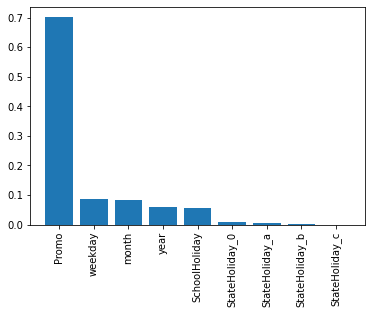

In [46]:
# 변수중요도 시각화
import matplotlib.pyplot as plt

plt.bar(imp_df['var'],imp_df['imp'])
plt.xticks(rotation=90)

### Three Fold Cross Validation
> cv = 3
- Train 데이터를 3가지로 쪼개서 각각의 데이터를 Test 데이터로 선정
- 나머지를 Train 데이터로 선정
- 학습을 통해 예측하고, 그 결과물에 대한 RMSE을 구함

In [47]:
## Cross Validation 함수 실행
from sklearn.model_selection import cross_val_score

cross_val_score(xgb, train[input_var], train['Sales'], scoring="neg_mean_squared_error", cv=3)

array([ -7442398.68110158, -10165475.69817356,  -7896996.52747543])

In [49]:
cross_val_score(xgb, train[['Promo','weekday','month','year','SchoolHoliday']], train['Sales'], scoring="neg_mean_squared_error", cv=3)

array([ -7437417.60656606, -10109891.53781048,  -7579785.74399885])

- StateHoliday 변수를 뺐을 때 MSE가 조금 더 작아짐 - 예측을 더 잘 함
- StateHoliday 변수는 있으나 마나다

In [50]:
import numpy as np
score_list=[] # cv_score가 전반적으로 얼마정도 나오는지
selected_varnum=[] # 몇 개의 변수를 선택하였는지

In [51]:
## 변수중요도가 중요한 순서대로 input 변수를 늘려가며 Cross Validation을 실행
## cross validation 결과물을 score_list에 저장
for i in range(1,10):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb, 
                             train[selected_var], 
                             train['Sales'], 
                             scoring="neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9


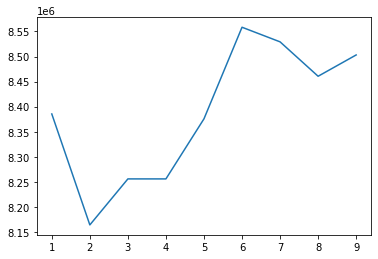

In [52]:
# 선택 변수에 따른 Cross Validation score를 시각화
plt.plot(selected_varnum, score_list)

- Promo와 weekday 딱 2개의 변수만 활용하는 것이 Cross Validation 결과가 가장 좋음

In [53]:
# input 변수를 수정해서 다시 제출파일을 생성
xgb.fit(train[['Promo','weekday']],
        train['Sales'])
test['Sales'] = xgb.predict(test[['Promo','weekday']])
test[['id','Sales']].to_csv("submission1.csv",index=False)

# 5. store 데이터 활용

In [55]:
train.loc[train['Store']==9]

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,weekday,year,month
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,3,2015,4
304,15233,9,2015-04-29,7761,1,0,1,0,0,0,2,2015,4
604,15533,9,2015-04-28,7906,1,0,1,0,0,0,1,2015,4
904,15833,9,2015-04-27,11737,1,0,1,0,0,0,0,2015,4
1214,16143,9,2015-04-25,6342,0,0,1,0,0,0,5,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60976,75905,9,2014-08-06,6746,1,1,1,0,0,0,2,2014,8
61228,76157,9,2014-08-05,7438,1,1,1,0,0,0,1,2014,8
61480,76409,9,2014-08-04,10061,1,1,1,0,0,0,0,2014,8
61741,76670,9,2014-08-02,6233,0,0,1,0,0,0,5,2014,8


In [56]:
# 보조 데이터인 store 데이터를 merge
train = pd.merge(train, store, on=['Store'], how='left')
test = pd.merge(test, store, on=['Store'], how='left')

train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,...,month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,...,5,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,...,5,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,...,5,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,...,4,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,...,4,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [57]:
# 경쟁업체가 언제 개장했는지 여부를 competitionopen 변수에 저장
train['CompetitionOpen'] = 12*( train['year'] - train['CompetitionOpenSinceYear'] ) + \
                             (train['month'] - train['CompetitionOpenSinceMonth'])

test['CompetitionOpen'] = 12*( test['year'] - test['CompetitionOpenSinceYear'] ) + \
                             (test['month'] - test['CompetitionOpenSinceMonth'])

In [58]:
# dt.weekofyear 함수를 통해 몇 번째 주인지를 추출
train['WeekOfYear'] = train['Date'].dt.weekofyear
test['WeekOfYear'] = test['Date'].dt.weekofyear

<ipython-input-58-b801da548c62>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['WeekOfYear'] = train['Date'].dt.weekofyear
<ipython-input-58-b801da548c62>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['WeekOfYear'] = test['Date'].dt.weekofyear


In [60]:
# 프로모션이 시작된지 얼마나 되었는지를 promoopen 변수에 저장
train['PromoOpen'] = 12* ( train['year'] - train['Promo2SinceYear'] ) + \
                        (train['WeekOfYear'] - train['Promo2SinceWeek']) / 4

test['PromoOpen'] = 12* ( test['year'] - test['Promo2SinceYear'] ) + \
                        (test['WeekOfYear'] - test['Promo2SinceWeek']) / 4

In [61]:
train.dtypes

id                                    int64
Store                                 int64
Date                         datetime64[ns]
Sales                                 int64
Promo                                 int64
SchoolHoliday                         int64
StateHoliday_0                        uint8
StateHoliday_a                        uint8
StateHoliday_b                        uint8
StateHoliday_c                        uint8
weekday                               int64
year                                  int64
month                                 int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
CompetitionOpen                 

In [62]:
# StoreType 변수를 One Hot Encoding
train = pd.get_dummies(columns=['StoreType'],data=train)
test = pd.get_dummies(columns=['StoreType'],data=test)

In [63]:
# Assortment 변수를 One Hot Encoding
train = pd.get_dummies(columns=['Assortment'],data=train)
test = pd.get_dummies(columns=['Assortment'],data=test)

In [64]:
# PromoInterval 변수를 One Hot Encoding
train = pd.get_dummies(columns=['PromoInterval'],data=train)
test = pd.get_dummies(columns=['PromoInterval'],data=test)

In [65]:
train.columns

Index(['id', 'Store', 'Date', 'Sales', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [66]:
test.columns

Index(['id', 'Store', 'Date', 'Promo', 'SchoolHoliday', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'weekday', 'year',
       'month', 'Sales', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionOpen', 'WeekOfYear', 'PromoOpen',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

# 6. 2차 모델링

In [67]:
# 2차 모델링을 위한 input 변수를 지정
input_var = ['Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'weekday', 'year', 'month', 'CompetitionDistance',
       'Promo2',
       'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec']

In [68]:
# 지정한 input 변수로 XGB 모델을 학습
xgb = XGBRegressor( n_estimators=300, learning_rate= 0.1, random_state=2020)
xgb.fit(train[input_var],train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=2020,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
# 학습된 모델에서 변수중요도를 뽑아 imp_df라는 데이터프레임으로 저장
imp_df = pd.DataFrame({'var':input_var,
                       'imp':xgb.feature_importances_})
imp_df = imp_df.sort_values(['imp'],ascending=False)

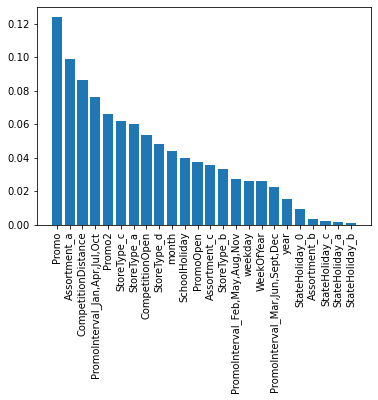

In [72]:
plt.bar(imp_df['var'],imp_df['imp'])
plt.xticks(rotation=90)
plt.show()

In [73]:
len(input_var)

24

In [70]:
score_list=[]
selected_varnum=[]

In [71]:
# 변수중요도가 중요한 순서대로 input 변수를 늘려가며 Cross Validation을 실행
# Cross Validation 결과물을 score_list에 저장
for i in range(1,25):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb, 
                             train[selected_var], 
                             train['Sales'], 
                             scoring="neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


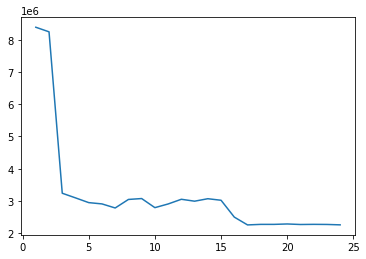

In [74]:
# 선택 변수에 따른 Cross Validation score를 시각화
plt.plot(selected_varnum, score_list)

- 최적이라고 나온 17개의 변수를 선택해 모델을 학습하고 예측해 제출파일로 저장

In [75]:
input_var = imp_df['var'].iloc[:17].tolist()

In [76]:
cross_val_score(xgb, train[input_var], train['Sales'], scoring="neg_mean_squared_error", cv=3)

array([-1891864.3944893 , -3117347.14293435, -1764367.61398689])

In [77]:
xgb.fit(train[input_var],
        train['Sales'])

test['Sales'] = xgb.predict(test[input_var])

test[['id','Sales']].to_csv("submission2.csv",index=False)

# 7. 파라미터 튜닝

In [78]:
# n_estimators 파라미터를 최적화
estim_list = [100,200,300,400,500,600,700,800,900]
score_list = []

In [79]:
for i in estim_list:
    xgb = XGBRegressor( n_estimators=i, learning_rate= 0.1, random_state=2020)
    scores = cross_val_score(xgb, train[input_var], train['Sales'], scoring="neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    print(i)

100
200
300
400
500
600
700
800
900


(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

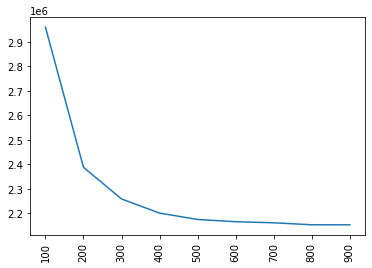

In [80]:
plt.plot(estim_list,score_list)
plt.xticks(rotation=90)

In [81]:
xgb = XGBRegressor( n_estimators=600, learning_rate= 0.1, random_state=2020)

In [82]:
xgb.fit(train[input_var],
        train['Sales'])

test['Sales'] = xgb.predict(test[input_var])

test[['id','Sales']].to_csv("submission3.csv",index=False)